# Final Group Project: A Review of Lewis Hamilton
#### Group Member: Catherine Jin, Oliver Zhao, Conny Zhou
#### Section: QTM 151, Section 3

I.Introduction

    -Background: What is F1?

    Formula One, also known as F1, is the highest class of single-seater auto racing that is sanctioned by the Fédération Internationale de l'Automobile (FIA). The F1 World Championship is the most prestigious and popular motorsport event in the world, featuring a series of races called Grands Prix that take place across the globe. F1 cars are the most technologically advanced and fastest racing cars in the world, capable of reaching speeds over 370 km/h (230 mph). The sport is known for its high levels of competition, drama, and excitement, with drivers and teams competing for the World Championship title each season. F1 is watched by millions of fans around the world and has a rich history dating back to the 1950s.


In [ ]:
##Lewis Hamilton
##Mclaren before 2013, Mercedez Bens after 2013
##Test
##zhaobo 6

In [1]:
#Import several libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Read csv dataset
results = pd.read_csv("data_raw/results.csv")
qualifying = pd.read_csv("data_raw/qualifying.csv")

In [11]:
##Get Mr.Hamilton's results from results
res_ham = results.query("driverId == 1")
qua_ham = qualifying.query("driverId == 1")

In [ ]:
res_ham

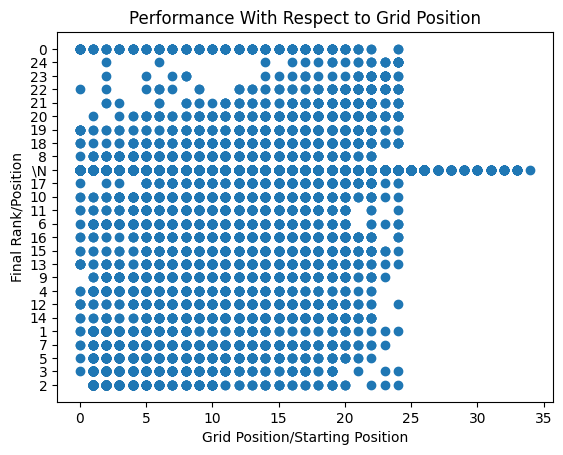

In [15]:
plt.scatter(x = results["grid"], y = results["rank"])
plt.xlabel("Grid Position/Starting Position")
plt.ylabel("Final Rank/Position")
plt.title("Performance With Respect to Grid Position")
plt.show()

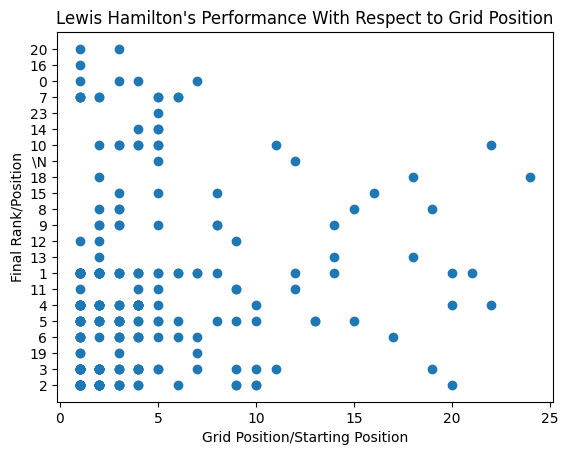

In [14]:
##Lewis Hamilton's Performance With Respect to Grid Position
plt.scatter(x = res_ham["grid"], y = res_ham["rank"])
plt.xlabel("Grid Position/Starting Position")
plt.ylabel("Final Rank/Position")
plt.title("Lewis Hamilton's Performance With Respect to Grid Position")
plt.show()

In [ ]:
plt.hist(qua_ham["position"],alpha = 0.5)
plt.legend(labels = )
plt.xlabel("Year")
plt.ylabel("Proportion of Urban Population")
plt.title("Proportion of Urban Population Versus Years")